In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
df = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines =True)
df.head(10)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
7,1,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...
8,1,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
oov_tok = '<OOV>'
max_len = 40
embedding_dim = 32
trunc_type = 'post'
padding_type = 'post'
vocab_size = 10000
training_size = 20000

In [25]:
training_sentences = df.headline[:training_size]
training_labels = df.is_sarcastic[:training_size]
print(type(training_labels))

testing_sentences = df.headline[training_size:]
testing_labels = df.is_sarcastic[training_size:]

<class 'pandas.core.series.Series'>


In [26]:
training_labels_f = np.array(training_labels)
testing_labels_f = np.array(testing_labels)

In [27]:
tokenizer = Tokenizer(num_words=vocab_size , oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [28]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_paded = pad_sequences(training_sequences, padding = padding_type, maxlen = max_len, truncating = trunc_type)

In [29]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_paded = pad_sequences(testing_sequences, padding = padding_type, maxlen = max_len, truncating = trunc_type)

In [30]:
#word_index

In [31]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 

In [32]:
training_paded.shape

(20000, 40)

In [33]:
testing_paded.shape

(8619, 40)

In [34]:
def decode_headline(text):
        return ' '.join([reverse_word_index.get(i,'?') for i in text])

In [35]:
print(decode_headline(training_paded[3]))

inclement weather prevents liar from getting to work ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?


In [36]:
training_sentences[3]

'inclement weather prevents liar from getting to work'

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 32)            320000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 320,817
Trainable params: 320,817
Non-trainable params: 0
_________________________________________________________________


In [39]:
num_epoch = 30
model_detail = model.fit(training_paded, training_labels_f, epochs = num_epoch, validation_data=(testing_paded, testing_labels_f), verbose = 2 )

Train on 20000 samples, validate on 8619 samples
Epoch 1/30
20000/20000 - 4s - loss: 0.5469 - accuracy: 0.7191 - val_loss: 0.3713 - val_accuracy: 0.8416
Epoch 2/30
20000/20000 - 4s - loss: 0.3034 - accuracy: 0.8770 - val_loss: 0.3294 - val_accuracy: 0.8593
Epoch 3/30
20000/20000 - 4s - loss: 0.2293 - accuracy: 0.9101 - val_loss: 0.3411 - val_accuracy: 0.8529
Epoch 4/30
20000/20000 - 4s - loss: 0.1870 - accuracy: 0.9282 - val_loss: 0.3600 - val_accuracy: 0.8477
Epoch 5/30
20000/20000 - 4s - loss: 0.1560 - accuracy: 0.9431 - val_loss: 0.3958 - val_accuracy: 0.8380
Epoch 6/30
20000/20000 - 4s - loss: 0.1329 - accuracy: 0.9512 - val_loss: 0.4271 - val_accuracy: 0.8378
Epoch 7/30
20000/20000 - 4s - loss: 0.1119 - accuracy: 0.9615 - val_loss: 0.4881 - val_accuracy: 0.8281
Epoch 8/30
20000/20000 - 4s - loss: 0.0965 - accuracy: 0.9671 - val_loss: 0.5200 - val_accuracy: 0.8290
Epoch 9/30
20000/20000 - 4s - loss: 0.0840 - accuracy: 0.9723 - val_loss: 0.5758 - val_accuracy: 0.8261
Epoch 10/30
200

In [40]:
import matplotlib.pyplot as plt

In [41]:
def plot_graphs(model_detail, string):
    plt.plot(model_detail.history[string])
    plt.plot(model_detail.history['val_' + string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()


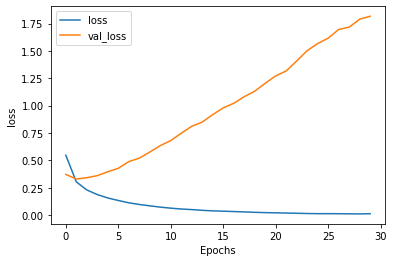

In [42]:
plot_graphs(model_detail, 'loss')

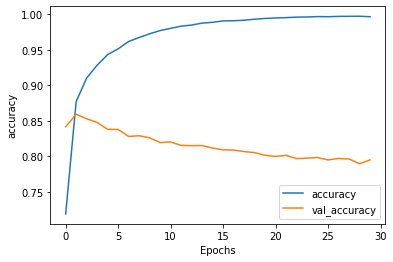

In [43]:
plot_graphs(model_detail, 'accuracy')